## Heart Attack Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [5]:
data=pd.read_csv('heart.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heartAttackRisk
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
correlation = data.corr()["heartAttackRisk"].abs().sort_values(ascending=False)
print("Feature Correlation with Heart Attack Risk:\n", correlation)

Feature Correlation with Heart Attack Risk:
 heartAttackRisk    1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
education          0.054248
heartRate          0.022907
currentSmoker      0.019448
Name: heartAttackRisk, dtype: float64


In [9]:
selected_features = correlation.index[1:4]  
data_selected = data[selected_features]
selected_features

Index(['age', 'sysBP', 'prevalentHyp'], dtype='object')

In [11]:
X = data_selected.values
y = data["heartAttackRisk"].values

In [41]:
X

array([[ 39. , 106. ,   0. ],
       [ 46. , 121. ,   0. ],
       [ 48. , 127.5,   0. ],
       ...,
       [ 52. , 133.5,   0. ],
       [ 40. , 141. ,   1. ],
       [ 39. , 133. ,   0. ]])

In [45]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_scaled

array([[-1.23428297, -1.19626692, -0.67124101],
       [-0.41766419, -0.5153989 , -0.67124101],
       [-0.18434454, -0.22035608, -0.67124101],
       ...,
       [ 0.28229477,  0.05199113, -0.67124101],
       [-1.11762315,  0.39242514,  1.48977788],
       [-1.23428297,  0.02929552, -0.67124101]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

X_train

array([[-1.11762315, -0.47000769, -0.67124101],
       [-0.06768471,  0.07468673, -0.67124101],
       [ 1.21557338,  0.57398994,  1.48977788],
       ...,
       [ 2.03219216, -0.47000769, -0.67124101],
       [ 1.21557338, -0.44731209, -0.67124101],
       [ 0.39895459, -0.7423549 , -0.67124101]])

In [17]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_train

array([[ 1.        , -1.11762315, -0.47000769, -0.67124101],
       [ 1.        , -0.06768471,  0.07468673, -0.67124101],
       [ 1.        ,  1.21557338,  0.57398994,  1.48977788],
       ...,
       [ 1.        ,  2.03219216, -0.47000769, -0.67124101],
       [ 1.        ,  1.21557338, -0.44731209, -0.67124101],
       [ 1.        ,  0.39895459, -0.7423549 , -0.67124101]])

In [19]:
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
X_test

array([[ 1.        , -0.65098384,  1.43642278,  1.48977788],
       [ 1.        ,  1.09891355, -0.5607901 , -0.67124101],
       [ 1.        , -1.00096332, -1.15087572, -0.67124101],
       ...,
       [ 1.        ,  0.39895459,  1.20946677,  1.48977788],
       [ 1.        , -0.53432402, -0.96931091,  1.48977788],
       [ 1.        , -0.53432402, -0.6742681 , -0.67124101]])

In [21]:
theta = np.zeros(X_train.shape[1])
theta

array([0., 0., 0., 0.])

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

In [29]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    for _ in range(num_iters):
        theta -= (alpha / m) * (X.T @ (sigmoid(X @ theta) - y))
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


In [40]:
alpha = 0.1
num_iters = 1000
theta_opt, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)



In [50]:
np.save(r"C:\Users\ARJUN CHAURASIYA\OneDrive\Desktop\Heart Attack Prediction\model.npy", theta_opt)
print(theta_opt)
# Save means and stds for later use in the app
np.save(r"C:\Users\ARJUN CHAURASIYA\OneDrive\Desktop\Heart Attack Prediction\means.npy", scaler.mean_)
np.save(r"C:\Users\ARJUN CHAURASIYA\OneDrive\Desktop\Heart Attack Prediction\stds.npy", scaler.scale_)


[-1.92595359  0.5368799   0.31407928  0.08937345]


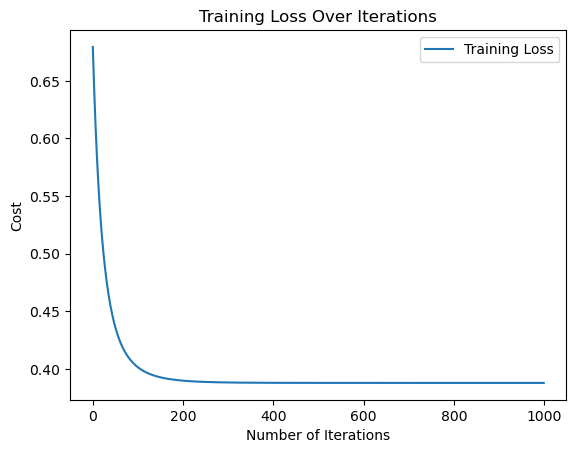

In [33]:
plt.plot(range(num_iters), cost_history, label="Training Loss")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Training Loss Over Iterations")
plt.legend()
plt.show()

In [126]:
y_pred_prob = sigmoid(X_test @ theta_opt)
y_pred = (y_pred_prob >= 0.5).astype(int)


conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
 [[893   6]
 [158   3]]
Precision: 0.33
Recall: 0.02
F1-Score: 0.04
Accuracy: 0.85


In [103]:
def plot_decision_boundary(X, y, theta, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap="coolwarm", edgecolors="k", alpha=0.6)
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = theta[0] + theta[1] * xx + theta[2] * yy
    Z = sigmoid(Z)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')
    plt.xlabel("Feature 1 (Standardized)")
    plt.ylabel("Feature 2 (Standardized)")
    plt.title(title)
    plt.show()

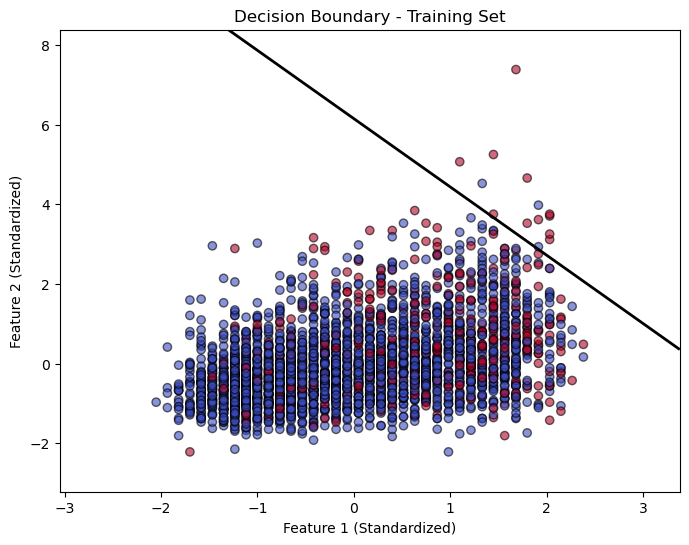

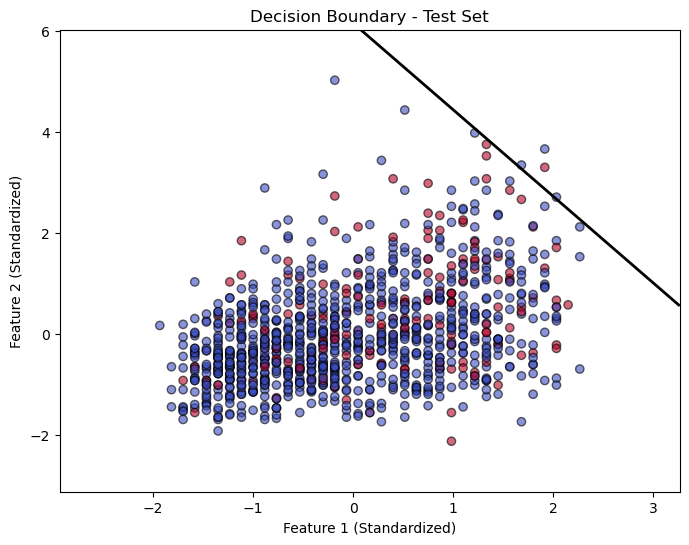

In [105]:
plot_decision_boundary(X_train, y_train, theta_opt, "Decision Boundary - Training Set")
plot_decision_boundary(X_test, y_test, theta_opt, "Decision Boundary - Test Set")